In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load cleaned data
df = pd.read_csv('/workspaces/Data-Analyst-Project-Portfolio/Customer_Churn_Analysis/data/Processed/cleaned_telco_data.csv')

# Drop customerID (not useful for modeling)
df.drop('customerID', axis=1, inplace=True)

In [3]:
# Convert target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Label encode binary categorical variables
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encode multi-category variables
df = pd.get_dummies(df, drop_first=True)


In [4]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.7963094393186657

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



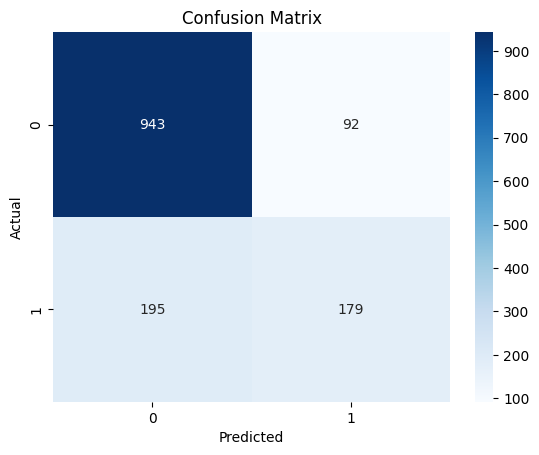

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()